###  Objective: Binary Classification model to predict whether the patient will have risk to have heart attack or not

### Steps Performed:
    ### 1. EDA (Univariate Analysis, Bi- Variate Analysis, Missing Value Analysis, Outlier Analysis)
    ### 2. Data Preprocessing 
    ### 3. Data Preparation
    ### 4. Feature selection
    ### 5. Model building
    ### 6. Model Evaluation
    ### 7. Model Tuning


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

%matplotlib inline

### Reading the data

In [2]:
df = pd.read_csv('take_home_assign_set.csv')

In [3]:
df.shape

(303, 14)

In [4]:
df.columns

Index(['age', 'gender', 'chest_pain_type', 'rest_blood_pressure',
       'cholesterol', 'fast_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'ex_ind_ang', 'prev_peak', 'slope', 'vessels_num', 'thal_result',
       'output'],
      dtype='object')

In [5]:
df.head()

,age,gender,chest_pain_type,rest_blood_pressure,cholesterol,fast_blood_sugar,rest_ecg,max_heart_rate,ex_ind_ang,prev_peak,slope,vessels_num,thal_result,output
0,63,1,Non-anginal pain,145,233,Yes,Normal,150,No,2.3,0,0,1,1
1,37,1,Atypical angina,130,250,No,ST-T wave normality,187,No,3.5,0,0,2,1
2,41,0,Typical angina,130,204,No,Normal,172,No,1.4,2,0,2,1
3,56,1,Typical angina,120,236,No,ST-T wave normality,178,No,0.8,2,0,2,1
4,57,0,NaN,120,354,No,ST-T wave normality,163,Yes,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain_type      160 non-null    object 
 3   rest_blood_pressure  303 non-null    int64  
 4   cholesterol          303 non-null    int64  
 5   fast_blood_sugar     303 non-null    object 
 6   rest_ecg             303 non-null    object 
 7   max_heart_rate       303 non-null    int64  
 8   ex_ind_ang           303 non-null    object 
 9   prev_peak            303 non-null    float64
 10  slope                303 non-null    int64  
 11  vessels_num          303 non-null    int64  
 12  thal_result          303 non-null    int64  
 13  output               303 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 33.3+ KB


### Exploratory Data Analysis

In [7]:
df.describe()

,age,gender,rest_blood_pressure,cholesterol,max_heart_rate,prev_peak,slope,vessels_num,thal_result,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Target variable - Frequency table

In [8]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

### we have nearly equal proportions of the target variable . Hence the dataset is Balanced dataset

In [9]:
df["output"].value_counts(1)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

###  Visualization of the target variable proportions in the Dataset

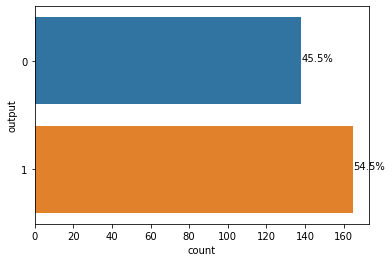

In [10]:
ax = sns.countplot(y="output",data=df)
total = len(df['output'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### Columnwise # of null values in the data - only chest pain type column (chest_pain_type) has null values

In [11]:
df.isnull().sum()

age                      0
gender                   0
chest_pain_type        143
rest_blood_pressure      0
cholesterol              0
fast_blood_sugar         0
rest_ecg                 0
max_heart_rate           0
ex_ind_ang               0
prev_peak                0
slope                    0
vessels_num              0
thal_result              0
output                   0
dtype: int64

## Univariate analysis on categorical variables

### chest_pain_type

In [12]:
df["chest_pain_type"].value_counts(dropna=False)

NaN                 143
Atypical angina      87
Typical angina       50
Non-anginal pain     23
Name: chest_pain_type, dtype: int64

### ~47% null values presented in the chest_pain_type  

In [13]:
df["chest_pain_type"].value_counts(1, dropna=False)*100

NaN                 47.194719
Atypical angina     28.712871
Typical angina      16.501650
Non-anginal pain     7.590759
Name: chest_pain_type, dtype: float64

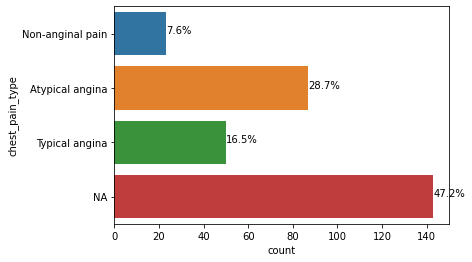

In [14]:
#sns.countplot(x=df["chest_pain_type"].fillna("NA"), color=sns.color_palette()[0]);
df["chest_pain_type"]=df["chest_pain_type"].fillna("NA")
ax = sns.countplot(y="chest_pain_type",data=df)
total = len(df['chest_pain_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### rest_ecg

In [15]:
df["rest_ecg"].value_counts(dropna=False)

ST-T wave normality             152
Normal                          147
Left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

### Left ventricular hypertrophy is a very low frequent category (~1.3%) in rest_ecg column

In [16]:
df["rest_ecg"].value_counts(1, dropna=False)*100

ST-T wave normality             50.165017
Normal                          48.514851
Left ventricular hypertrophy     1.320132
Name: rest_ecg, dtype: float64

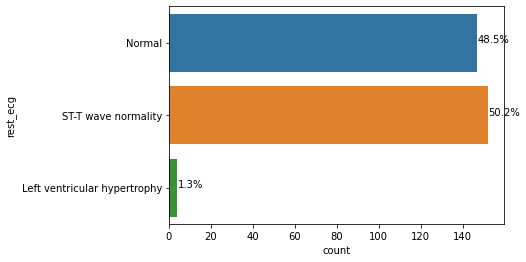

In [17]:
ax = sns.countplot(y="rest_ecg",data=df)
total = len(df['rest_ecg'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### ex_ind_ang

In [18]:
df["ex_ind_ang"].value_counts(dropna=False)

No     204
Yes     99
Name: ex_ind_ang, dtype: int64

### Most of the patients (~67%) don't have exercise induced angina

In [19]:
df["ex_ind_ang"].value_counts(1, dropna=False)*100

No     67.326733
Yes    32.673267
Name: ex_ind_ang, dtype: float64

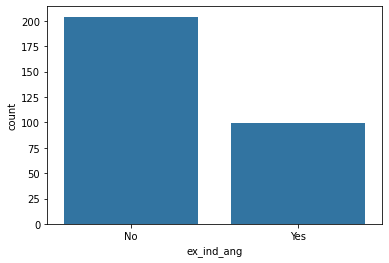

In [20]:
sns.countplot(x="ex_ind_ang",data=df, color=sns.color_palette()[0]);

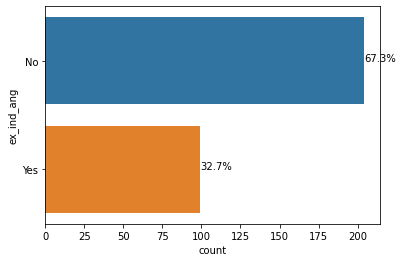

In [21]:
ax = sns.countplot(y="ex_ind_ang",data=df)
total = len(df['ex_ind_ang'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### gender

In [22]:
df["gender"].value_counts(dropna=False)

1    207
0     96
Name: gender, dtype: int64

In [23]:
df["gender"].value_counts(1, dropna=False)*100

1    68.316832
0    31.683168
Name: gender, dtype: float64

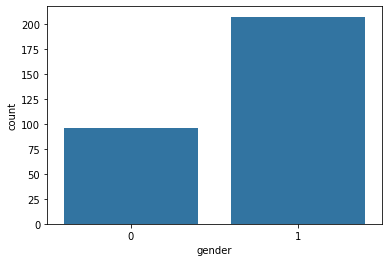

In [24]:
sns.countplot(x="gender",data=df, color=sns.color_palette()[0]);

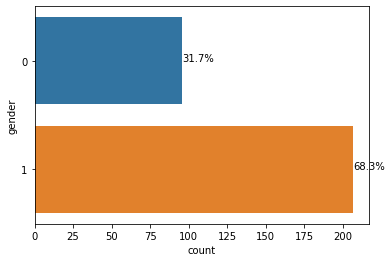

In [25]:
ax = sns.countplot(y="gender",data=df)
total = len(df['gender'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### fast_blood_sugar

In [26]:
df["fast_blood_sugar"].value_counts()

No     258
Yes     45
Name: fast_blood_sugar, dtype: int64

### Very few patients have fasting blood sugar

In [27]:
df["fast_blood_sugar"].value_counts(1, dropna=False)*100

No     85.148515
Yes    14.851485
Name: fast_blood_sugar, dtype: float64

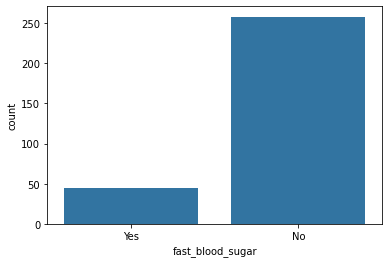

In [28]:
sns.countplot(x="fast_blood_sugar",data=df, color=sns.color_palette()[0]);

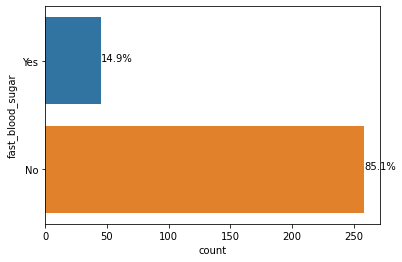

In [29]:
ax = sns.countplot(y="fast_blood_sugar",data=df)
total = len(df['fast_blood_sugar'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### Bi-variate analysis between each categorical variable/feature and target variable

### chest_pain_type - output/heart attack

In [30]:
pd.crosstab(df["chest_pain_type"].fillna("NA"), df["output"], margins=2)

output,0,1,All
chest_pain_type,,,
Atypical angina,18,69,87
NA,104,39,143
Non-anginal pain,7,16,23
Typical angina,9,41,50
All,138,165,303


###  patients with angina problems (atypical/typical) has high chance of heart attack

In [31]:
pd.crosstab(df["chest_pain_type"].fillna("NA"), df["output"], normalize="index")

output,0,1
chest_pain_type,,
Atypical angina,0.206897,0.793103
NA,0.727273,0.272727
Non-anginal pain,0.304348,0.695652
Typical angina,0.180000,0.820000


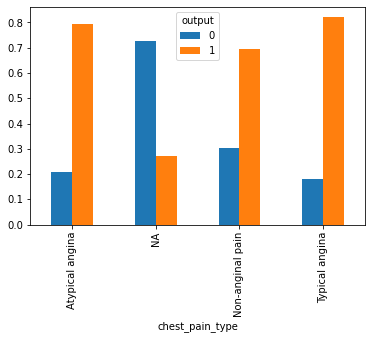

In [32]:
ct=pd.crosstab(df["chest_pain_type"].fillna("NA"), df["output"], normalize="index")
ax=ct.plot.bar()

### rest_ecg - output/heart attack

In [33]:
pd.crosstab(df["rest_ecg"], df["output"], margins=2)

output,0,1,All
rest_ecg,,,
Left ventricular hypertrophy,3,1,4
Normal,79,68,147
ST-T wave normality,56,96,152
All,138,165,303


### patients ecg results with ST-T wave normality has high chance of heart attack

In [34]:
pd.crosstab(df["rest_ecg"], df["output"], normalize="index")

output,0,1
rest_ecg,,
Left ventricular hypertrophy,0.750000,0.250000
Normal,0.537415,0.462585
ST-T wave normality,0.368421,0.631579


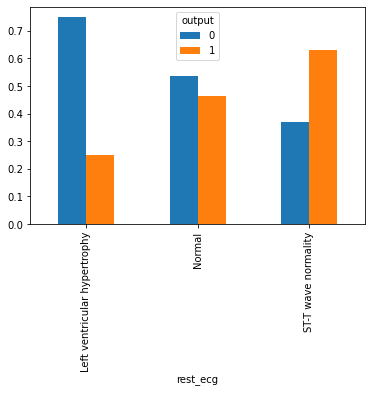

In [35]:
ct=pd.crosstab(df["rest_ecg"].fillna("NA"), df["output"], normalize="index")
ax=ct.plot.bar()

### ex_ind_ang - output/heart attack

In [36]:
pd.crosstab(df["ex_ind_ang"], df["output"], margins=2)

output,0,1,All
ex_ind_ang,,,
No,62,142,204
Yes,76,23,99
All,138,165,303


### patients don't have exercise induced angina has high chance of heart attack

In [37]:
pd.crosstab(df["ex_ind_ang"], df["output"], normalize="index")

output,0,1
ex_ind_ang,,
No,0.303922,0.696078
Yes,0.767677,0.232323


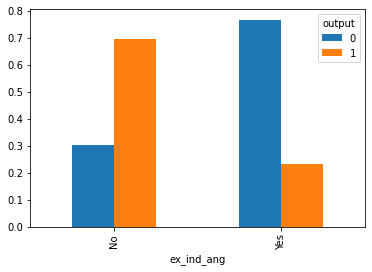

In [38]:
ct=pd.crosstab(df["ex_ind_ang"].fillna("NA"), df["output"], normalize="index")
ax=ct.plot.bar()

### gender - output/heart attack

In [39]:
pd.crosstab(df["gender"], df["output"], margins=2)

output,0,1,All
gender,,,
0,24,72,96
1,114,93,207
All,138,165,303


### gender with 0 category have high chance of heart attack 

In [40]:
pd.crosstab(df["gender"], df["output"], normalize="index")

output,0,1
gender,,
0,0.250000,0.750000
1,0.550725,0.449275


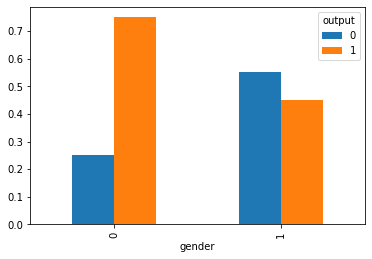

In [41]:
ct=pd.crosstab(df["gender"].fillna("NA"), df["output"], normalize="index")
ax=ct.plot.bar()

### fast_blood_sugar - output/heart attack

In [42]:
pd.crosstab(df["fast_blood_sugar"], df["output"], margins=2)

output,0,1,All
fast_blood_sugar,,,
No,116,142,258
Yes,22,23,45
All,138,165,303


In [43]:
pd.crosstab(df["fast_blood_sugar"], df["output"], normalize="index")

output,0,1
fast_blood_sugar,,
No,0.449612,0.550388
Yes,0.488889,0.511111


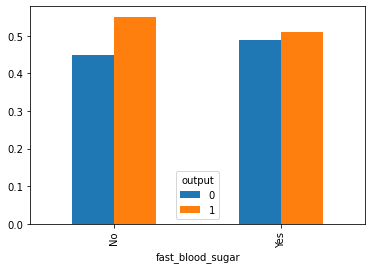

In [44]:
ct=pd.crosstab(df["fast_blood_sugar"].fillna("NA"), df["output"], normalize="index")
ax=ct.plot.bar()

### Univariate analysis on numerical variables

### age

In [45]:
df["age"].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

### age variable is approximately normally distributed

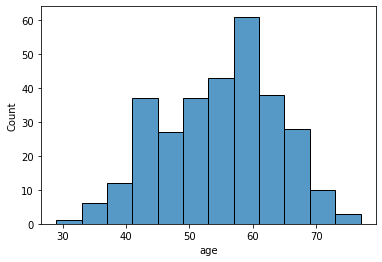

In [46]:
sns.histplot(data=df, x="age");

### No outliers were presented in age variable

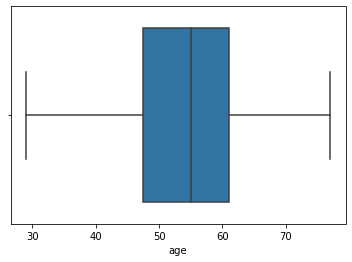

In [47]:
sns.boxplot(x=df["age"]);

### rest_blood_pressure

In [48]:
df["rest_blood_pressure"].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_blood_pressure, dtype: float64

### Resting blood pressure is approximately normally distributed

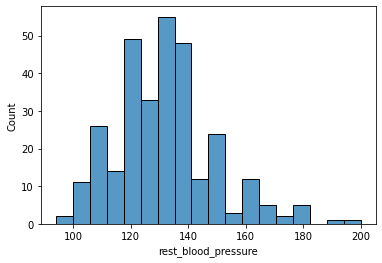

In [49]:
sns.histplot(data=df, x="rest_blood_pressure");

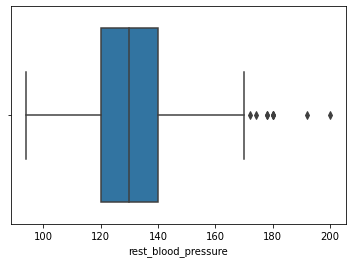

In [50]:
sns.boxplot(x=df["rest_blood_pressure"]);

### Outlier detection function using IQR method

In [51]:
def outlier_detection(col_name, data_frame):
    """ This function is used to detect the outliers in 
        give column in a data frame using IQR method """
    Q1,Q3 = np.percentile(data_frame[col_name] , [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = np.array(data_frame.loc[(data_frame[col_name] < lower_bound) | (data_frame[col_name] > upper_bound), col_name])
    return {"outliers": outliers, "count": len(outliers)}

### 9 outliers were presented in the resting blood pressure variable

In [52]:
outlier_detection("rest_blood_pressure", df)

{'outliers': array([172, 178, 180, 180, 200, 174, 192, 178, 180], dtype=int64),
 'count': 9}

### cholesterol

In [53]:
df["cholesterol"].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: cholesterol, dtype: float64

### cholesterol variable is approximately normally distributed

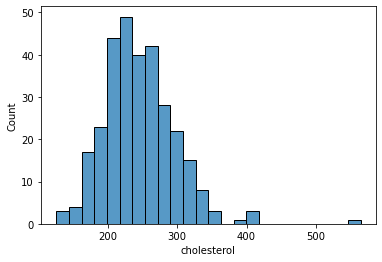

In [54]:
sns.histplot(data=df, x="cholesterol");

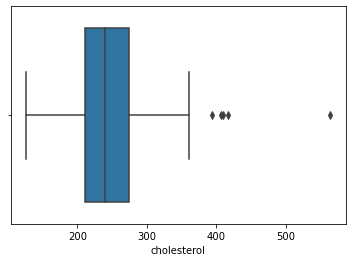

In [55]:
sns.boxplot(x=df["cholesterol"]);

### 5 outliers were presented in the cholesterol variable

In [56]:
outlier_detection("cholesterol", df)

{'outliers': array([417, 564, 394, 407, 409], dtype=int64), 'count': 5}

### max_heart_rate

In [57]:
df["max_heart_rate"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: max_heart_rate, dtype: float64

### Maximum heart rate variable is approximately normally distributed

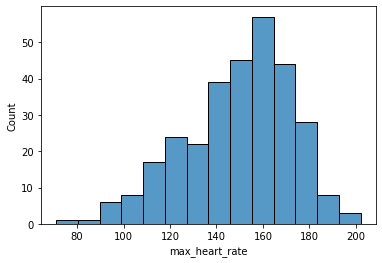

In [58]:
sns.histplot(data=df, x="max_heart_rate");

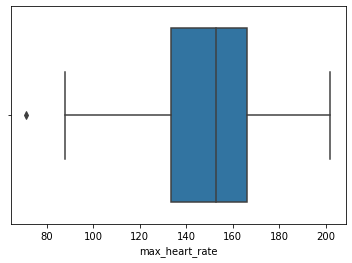

In [59]:
sns.boxplot(x=df["max_heart_rate"]);

### Only 1 outlier is presented in the maximum heart rate variable

In [60]:
outlier_detection("max_heart_rate", df)

{'outliers': array([71], dtype=int64), 'count': 1}

### prev_peak

In [61]:
df["prev_peak"].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: prev_peak, dtype: float64

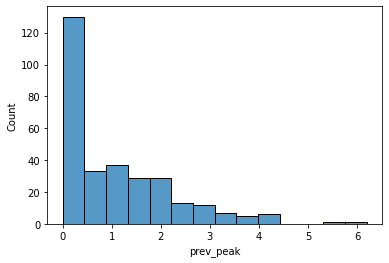

In [62]:
sns.histplot(data=df, x="prev_peak");

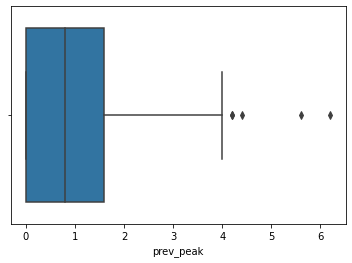

In [63]:
sns.boxplot(x=df["prev_peak"]);

### 5 outliers were presented in the previous/old peak variable

In [64]:
outlier_detection("prev_peak", df)

{'outliers': array([4.2, 6.2, 5.6, 4.2, 4.4]), 'count': 5}

### slope

In [65]:
df["slope"].describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

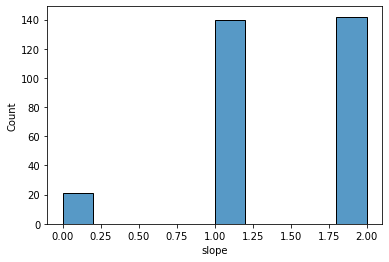

In [66]:
sns.histplot(data=df, x="slope");

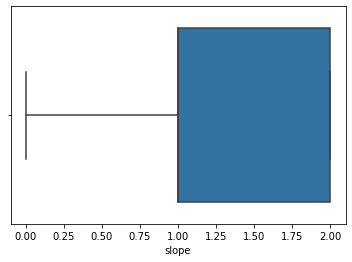

In [67]:
sns.boxplot(x=df["slope"]);

### vessels_num

In [68]:
df["vessels_num"].describe()

count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: vessels_num, dtype: float64

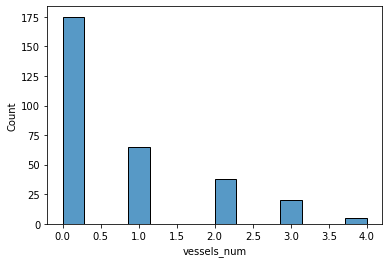

In [69]:
sns.histplot(data=df, x="vessels_num");

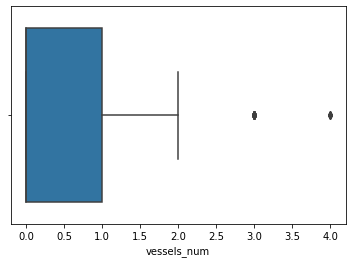

In [70]:
sns.boxplot(x=df["vessels_num"]);

In [71]:
outlier_detection("vessels_num", df)

{'outliers': array([3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3,
        3, 3, 3], dtype=int64),
 'count': 25}

### thal_result

In [72]:
df["thal_result"].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal_result, dtype: float64

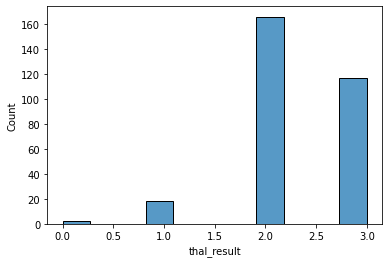

In [73]:
sns.histplot(data=df, x="thal_result");

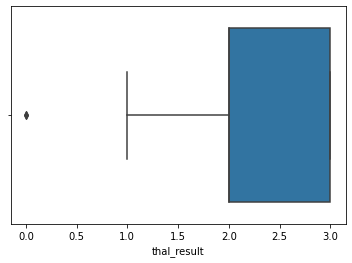

In [74]:
sns.boxplot(x=df["thal_result"]);

### Bi-variate analysis between each numeric variable and output/heart attack

### age - output/heart attack

In [75]:
pd.crosstab(np.where(df["age"]>df["age"].median(),">"+ str(int(df["age"].median())) ,
                     "<=" + str(int(df["age"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=55,49,103,152
>55,89,62,151
All,138,165,303


### Age group between 47 to 69 have higher chances of getting heart attack 

In [76]:
pd.crosstab(pd.cut(df['age'], bins=np.linspace(25, 80, 6)), df["output"], margins=2)

output,0,1,All
age,,,
"(25.0, 36.0]",2,5,7
"(36.0, 47.0]",19,50,69
"(47.0, 58.0]",56,67,123
"(58.0, 69.0]",57,37,94
"(69.0, 80.0]",4,6,10
All,138,165,303


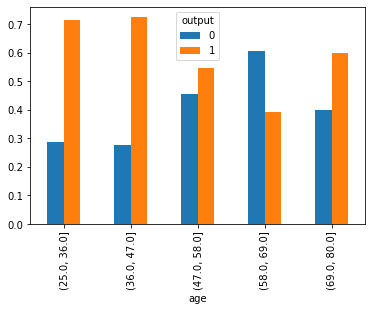

In [77]:
ct=pd.crosstab(pd.cut(df['age'], bins=np.linspace(25, 80, 6)), df["output"],normalize="index" )
ax=ct.plot.bar()

In [78]:
pd.crosstab(pd.cut(df['age'], bins=np.linspace(25, 80, 6)), df["output"],normalize="index" )

output,0,1
age,,
"(25.0, 36.0]",0.285714,0.714286
"(36.0, 47.0]",0.275362,0.724638
"(47.0, 58.0]",0.455285,0.544715
"(58.0, 69.0]",0.606383,0.393617
"(69.0, 80.0]",0.400000,0.600000


### age group <=55 have higher chance of heart attack. But it may be depends on other factors also.

In [79]:
pd.crosstab(np.where(df["age"]>df["age"].median(),">"+ str(int(df["age"].median())) ,
                     "<=" + str(int(df["age"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=55,0.322368,0.677632
>55,0.589404,0.410596


### rest_blood_pressure - output/heart attack

In [80]:
pd.crosstab(np.where(df["rest_blood_pressure"]>df["rest_blood_pressure"].median(),
                     ">"+ str(int(df["rest_blood_pressure"].median())) ,
                     "<=" + str(int(df["rest_blood_pressure"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=130,71,100,171
>130,67,65,132
All,138,165,303


### patients with resting blood pressure level <=240 have higher chance of heart attack

In [81]:
pd.crosstab(np.where(df["rest_blood_pressure"]>df["rest_blood_pressure"].median(),
                     ">"+ str(int(df["rest_blood_pressure"].median())) ,
                     "<=" + str(int(df["rest_blood_pressure"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=130,0.415205,0.584795
>130,0.507576,0.492424


### cholesterol - output/heart attack

In [82]:
pd.crosstab(np.where(df["cholesterol"]>df["cholesterol"].median(),
                     ">"+ str(int(df["cholesterol"].median())) ,
                     "<=" + str(int(df["cholesterol"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=240,59,93,152
>240,79,72,151
All,138,165,303


### patients with cholesterol level <=240 have higher chance of heart attack

In [83]:
pd.crosstab(np.where(df["cholesterol"]>df["cholesterol"].median(),
                     ">"+ str(int(df["cholesterol"].median())) ,
                     "<=" + str(int(df["cholesterol"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=240,0.388158,0.611842
>240,0.523179,0.476821


### max_heart_rate - output/heart attack

In [84]:
pd.crosstab(np.where(df["max_heart_rate"]>df["max_heart_rate"].median(),
                     ">"+ str(int(df["max_heart_rate"].median())) ,
                     "<=" + str(int(df["max_heart_rate"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=153,97,57,154
>153,41,108,149
All,138,165,303


### patients with maximum heart rate > 153 have higher chance (~72%) of heart attack 

In [85]:
pd.crosstab(np.where(df["max_heart_rate"]>df["max_heart_rate"].median(),
                     ">"+ str(int(df["max_heart_rate"].median())) ,
                     "<=" + str(int(df["max_heart_rate"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=153,0.629870,0.370130
>153,0.275168,0.724832


### prev_peak - output/heart attack

In [86]:
pd.crosstab(np.where(df["prev_peak"]>df["prev_peak"].median(),
                     ">"+ str(int(df["prev_peak"].median())) ,
                     "<=" + str(int(df["prev_peak"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=0,44,119,163
>0,94,46,140
All,138,165,303


### Patients with no prior peak also have higher chance of heart attack

In [87]:
pd.crosstab(np.where(df["prev_peak"]>df["prev_peak"].median(),
                     ">"+ str(int(df["prev_peak"].median())) ,
                     "<=" + str(int(df["prev_peak"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=0,0.269939,0.730061
>0,0.671429,0.328571


### slope - output/heart attack

In [88]:
pd.crosstab(np.where(df["slope"]>df["slope"].median(),
                     ">"+ str(int(df["slope"].median())) ,
                     "<=" + str(int(df["slope"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=1,103,58,161
>1,35,107,142
All,138,165,303


### Patients with slope value greater than 1 having higher chance (~75%) of heart attack

In [89]:
pd.crosstab(np.where(df["slope"]>df["slope"].median(),
                     ">"+ str(int(df["slope"].median())) ,
                     "<=" + str(int(df["slope"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=1,0.639752,0.360248
>1,0.246479,0.753521


### vessels_num - output/heart attack

In [90]:
pd.crosstab(np.where(df["vessels_num"]>df["vessels_num"].median(),
                     ">"+ str(int(df["vessels_num"].median())) ,
                     "<=" + str(int(df["vessels_num"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=0,45,130,175
>0,93,35,128
All,138,165,303


### Patients with 0 major vessels have higher chance (~74%) of heart attack

In [91]:
pd.crosstab(np.where(df["vessels_num"]>df["vessels_num"].median(),
                     ">"+ str(int(df["vessels_num"].median())) ,
                     "<=" + str(int(df["vessels_num"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=0,0.257143,0.742857
>0,0.726562,0.273438


### thal_result - output/heart attack

In [92]:
pd.crosstab(np.where(df["thal_result"]>df["thal_result"].median(),
                     ">"+ str(int(df["thal_result"].median())) ,
                     "<=" + str(int(df["thal_result"].median()))), df["output"], margins=2)

output,0,1,All
row_0,,,
<=2,49,137,186
>2,89,28,117
All,138,165,303


### Thalium Stress Test result with <=-2 values have higher chance (~74%) of heart attack

In [93]:
pd.crosstab(np.where(df["thal_result"]>df["thal_result"].median(),
                     ">"+ str(int(df["thal_result"].median())) ,
                     "<=" + str(int(df["thal_result"].median()))), df["output"], normalize="index")

output,0,1
row_0,,
<=2,0.263441,0.736559
>2,0.760684,0.239316


### Checking correlation between numerical features

In [94]:
numrc_feats = ["age", "rest_blood_pressure", "cholesterol", "max_heart_rate",
               "prev_peak", "slope", "vessels_num", "thal_result"]

In [95]:
numrc_corr_vals = df[numrc_feats].corr()

In [96]:
numrc_corr_vals

,age,rest_blood_pressure,cholesterol,max_heart_rate,prev_peak,slope,vessels_num,thal_result
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.168814,0.276326,0.068001
rest_blood_pressure,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.121475,0.101389,0.062210
cholesterol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.004038,0.070511,0.098803
max_heart_rate,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.386784,-0.213177,-0.096439
prev_peak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.577537,0.222682,0.210244
slope,-0.168814,-0.121475,-0.004038,0.386784,-0.577537,1.000000,-0.080155,-0.104764
vessels_num,0.276326,0.101389,0.070511,-0.213177,0.222682,-0.080155,1.000000,0.151832
thal_result,0.068001,0.062210,0.098803,-0.096439,0.210244,-0.104764,0.151832,1.000000


### No Multicollinearity between numerical features 

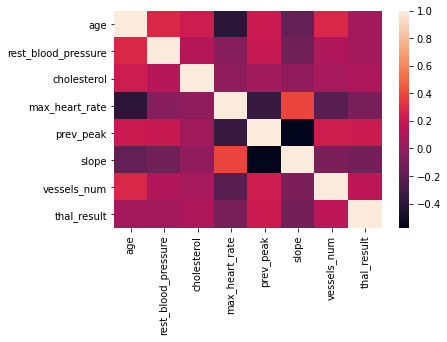

In [97]:
sns.heatmap(numrc_corr_vals, xticklabels=numrc_corr_vals.columns, yticklabels=numrc_corr_vals.columns);

### Function to calculate the cramers_v coefficient value

In [98]:
def cramers_V(var1,var2) :
    """ This function is used to calculate the cramers_v correlation coefficient between two categorical variables """
    crosstab =np.array(pd.crosstab(var1, var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [99]:
categ_feats = ["chest_pain_type", "rest_ecg", "ex_ind_ang", "gender", "fast_blood_sugar"]

### Checking cramers v correlation between categorical features

In [100]:
rows = []
for var1 in df[categ_feats]:
    col = []
    for var2 in df[categ_feats] :
        cramers = cramers_V(df[var1], df[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
cramers_v_corr_df = pd.DataFrame(cramers_results, columns = df[categ_feats].columns, index = df[categ_feats].columns)


In [101]:
cramers_v_corr_df

,chest_pain_type,rest_ecg,ex_ind_ang,gender,fast_blood_sugar
chest_pain_type,1.00,0.02,0.22,0.02,0.01
rest_ecg,0.02,1.00,0.01,0.01,0.01
ex_ind_ang,0.22,0.01,0.99,0.02,0.00
gender,0.02,0.01,0.02,0.98,0.00
fast_blood_sugar,0.01,0.01,0.00,0.00,0.97


### No Multicollinearity between categorical features 

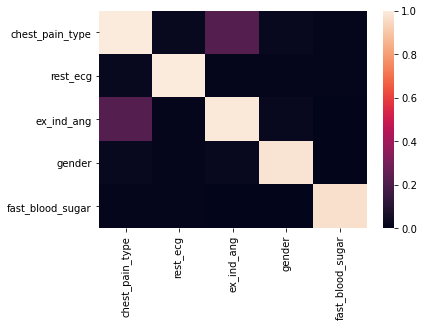

In [102]:
sns.heatmap(cramers_v_corr_df, xticklabels=cramers_v_corr_df.columns, yticklabels=cramers_v_corr_df.columns);

In [103]:
df_prep = df.copy()

## Data Preparation (Missing value analysis (if any), feature engineering)

### Replacing all missing values with separate category "NA" because ~47% of missing values are presented in chest pain type column

In [104]:
df_prep["chest_pain_type"] = df_prep["chest_pain_type"].fillna("NA")

### Combining low frequent categories

In [105]:
df_prep.loc[df_prep["rest_ecg"] == "Left ventricular hypertrophy", "rest_ecg"] = "Normal"

###  Encoding of Binary catagorical variables

In [106]:
df_prep["ex_ind_ang"] = df_prep["ex_ind_ang"].map({"Yes" : 1, "No" : 0})

In [107]:
df_prep["fast_blood_sugar"] = df_prep["fast_blood_sugar"].map({"Yes" : 1, "No" : 0})

In [108]:
df_prep["rest_ecg"] = df_prep["rest_ecg"].map({"ST-T wave normality" : 1, "Normal" : 0})

### one hot encoding

In [109]:
df_categ_ohe = pd.get_dummies(df_prep[categ_feats])

In [110]:
df_categ_ohe.head()

,rest_ecg,ex_ind_ang,gender,fast_blood_sugar,chest_pain_type_Atypical angina,chest_pain_type_NA,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina
0,0,0,1,1,0,0,1,0
1,1,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,1
4,1,1,0,0,0,1,0,0


In [111]:
df_model_feat = pd.concat([df_categ_ohe, df[numrc_feats]], axis=1)

In [112]:
df_model_feat.shape

(303, 16)

In [113]:
df_model_feat.head()

,rest_ecg,ex_ind_ang,gender,fast_blood_sugar,chest_pain_type_Atypical angina,chest_pain_type_NA,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina,age,rest_blood_pressure,cholesterol,max_heart_rate,prev_peak,slope,vessels_num,thal_result
0,0,0,1,1,0,0,1,0,63,145,233,150,2.3,0,0,1
1,1,0,1,0,1,0,0,0,37,130,250,187,3.5,0,0,2
2,0,0,0,0,0,0,0,1,41,130,204,172,1.4,2,0,2
3,1,0,1,0,0,0,0,1,56,120,236,178,0.8,2,0,2
4,1,1,0,0,0,1,0,0,57,120,354,163,0.6,2,0,2


### Dividing data into train and test

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df_model_feat, df_prep["output"], test_size=0.3, 
                                                    random_state=42, stratify=df_prep["output"])

### Building baseline logistic regression model

In [115]:
logreg_model = LogisticRegression(solver="liblinear", random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### Predictions on train and test data using baseline logistic regression model

In [116]:
y_train_pred_logreg_model = logreg_model.predict(X_train)

In [117]:
y_test_pred_logreg_model = logreg_model.predict(X_test)

### Model evaluation metrics on train and test data using baseline logistic regression model

In [118]:
print(classification_report(y_train, y_train_pred_logreg_model))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        97
           1       0.83      0.93      0.88       115

    accuracy                           0.86       212
   macro avg       0.87      0.85      0.86       212
weighted avg       0.86      0.86      0.86       212



In [119]:
print(classification_report(y_test, y_test_pred_logreg_model))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



In [120]:
round(roc_auc_score(y_train, logreg_model.predict_proba(X_train)[:, 1])*100, 2)

93.86

In [121]:
round(roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])*100, 2)

86.68

### Plot ROC Curves of train and test data using baseline logisitic regression model

In [122]:
train_fpr_logreg_model, train_tpr_logreg_model, _ = roc_curve(y_train, logreg_model.predict_proba(X_train)[:, 1])
test_fpr_logreg_model, test_tpr_logreg_model, _ = roc_curve(y_test, logreg_model.predict_proba(X_test)[:, 1])

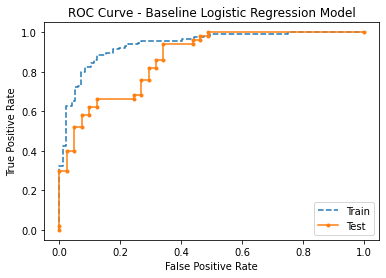

In [123]:
plt.plot(train_fpr_logreg_model, train_tpr_logreg_model, linestyle='--', label='Train')
plt.plot(test_fpr_logreg_model, test_tpr_logreg_model, marker='.', label='Test')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Logistic Regression Model')
plt.legend()

plt.show()

### Building baseline Decision Tree model

In [124]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Predictions on train and test using baseline decision tree classifier model

In [125]:
y_train_pred_dt_model = dt_model.predict(X_train)

In [126]:
y_test_pred_dt_model = dt_model.predict(X_test)

### Model evaluation metrics on train and test data using baseline decision tree classifier model

In [127]:
print(classification_report(y_train, y_train_pred_dt_model))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       115

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [128]:
print(classification_report(y_test, y_test_pred_dt_model))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        41
           1       0.77      0.82      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.77        91
weighted avg       0.77      0.77      0.77        91



In [129]:
round(roc_auc_score(y_train, dt_model.predict_proba(X_train)[:, 1])*100, 2)

100.0

In [130]:
round(roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])*100, 2)

76.37

### Plot ROC Curves of train and test data using baseline decision tree classifier model 

In [131]:
train_fpr_dt_model, train_tpr_dt_model, _ = roc_curve(y_train, dt_model.predict_proba(X_train)[:, 1])
test_fpr_dt_model, test_tpr_dt_model, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

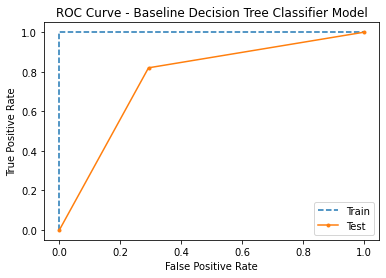

In [132]:
plt.plot(train_fpr_dt_model, train_tpr_dt_model, linestyle='--', label='Train')
plt.plot(test_fpr_dt_model, test_tpr_dt_model, marker='.', label='Test')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Decision Tree Classifier Model')
plt.legend()

plt.show()

### Feature Importance Plot for Baseline Decision Tree Classifier Model

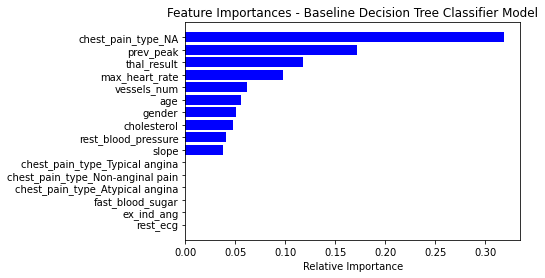

In [133]:
dt_model_features = list(X_train.columns)
dt_model_feat_importances = dt_model.feature_importances_
indices = np.argsort(dt_model_feat_importances)

plt.title('Feature Importances - Baseline Decision Tree Classifier Model')
plt.barh(range(len(indices)), dt_model_feat_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [dt_model_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Few features have zero feature importance values. We can remove this features from model

In [134]:
dt_model_feat_imp_df = pd.DataFrame({"Features":dt_model_features, "Importances":dt_model_feat_importances}).sort_values(by="Importances")

In [135]:
dt_model_feat_imp_df

,Features,Importances
0,rest_ecg,0.000000
1,ex_ind_ang,0.000000
3,fast_blood_sugar,0.000000
4,chest_pain_type_Atypical angina,0.000000
6,chest_pain_type_Non-anginal pain,0.000000
7,chest_pain_type_Typical angina,0.000000
13,slope,0.037939
9,rest_blood_pressure,0.040642
10,cholesterol,0.047418
2,gender,0.050736


In [136]:
dt_model_feat_imp_df.loc[dt_model_feat_imp_df["Importances"]==0, "Features"].tolist()

['rest_ecg',
 'ex_ind_ang',
 'fast_blood_sugar',
 'chest_pain_type_Atypical angina',
 'chest_pain_type_Non-anginal pain',
 'chest_pain_type_Typical angina']

### We have fitted 2 basline models on the data. 1. Logistic Regression 2. Decision Tree Classifier. Out of this 2, logistic regression baseline model is performing better than decision tree classifier. There is lot of model overfitting in decision tree baseline model. But in logistic regression baseline model also, we can observe some overfitting. The next step is to tune the baseline models to reduce the overfitting.

### Tuning logistic regression model using grid search cross validation (3 Repeated Stratified 5 Fold and grid search)

In [137]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.849136 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.831807 (0.047133) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833897 (0.043733) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.831407 (0.046667) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.832945 (0.043597) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.831060 (0.039249) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830203 (0.049873) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.844497 (0.037398) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.841905 (0.041538) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.841225 (0.042801) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.839669 (0.050853) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.848002 (0.043023) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.849136 (0.042393) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.771329 (0.080928) wit

In [138]:
logreg_model_tuned = LogisticRegression(C=grid_result.best_params_['C'], penalty=grid_result.best_params_['penalty'], 
                                        solver=grid_result.best_params_['solver'], random_state=42)
logreg_model_tuned.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

### Predictions on train and test data using tuned logistic regression model

In [139]:
y_train_pred_logreg_model_tuned = logreg_model_tuned.predict(X_train)

In [140]:
y_test_pred_logreg_model_tuned = logreg_model_tuned.predict(X_test)

### Model evaluation metrics on train and test data using tuned logistic regression model

In [141]:
print(classification_report(y_train, y_train_pred_logreg_model_tuned))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        97
           1       0.83      0.92      0.87       115

    accuracy                           0.85       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.86      0.85      0.85       212



In [142]:
print(classification_report(y_test, y_test_pred_logreg_model_tuned))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73        41
           1       0.76      0.84      0.80        50

    accuracy                           0.77        91
   macro avg       0.77      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



In [143]:
round(roc_auc_score(y_train, logreg_model_tuned.predict_proba(X_train)[:, 1])*100, 2)

92.8

In [144]:
round(roc_auc_score(y_test, logreg_model_tuned.predict_proba(X_test)[:, 1])*100, 2)

86.54

### Plot ROC Curves of train and test data using tuned logisitic regression model

In [145]:
train_fpr_logreg_model_tuned, train_tpr_logreg_model_tuned, _ = roc_curve(y_train, logreg_model_tuned.predict_proba(X_train)[:, 1])
test_fpr_logreg_model_tuned, test_tpr_logreg_model_tuned, _ = roc_curve(y_test, logreg_model_tuned.predict_proba(X_test)[:, 1])

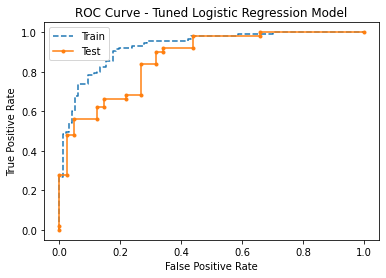

In [146]:
plt.plot(train_fpr_logreg_model_tuned, train_tpr_logreg_model_tuned, linestyle='--', label='Train')
plt.plot(test_fpr_logreg_model_tuned, test_tpr_logreg_model_tuned, marker='.', label='Test')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Logistic Regression Model')
plt.legend()

plt.show()

### Tuning decision tree classifier model using grid search cross validation (3 Repeated Stratified 5 Fold and grid search) after "removing variables with 0 feature importance"

In [147]:
X_train_after_drop_0_feat_imp_vars = X_train.drop(dt_model_feat_imp_df.loc[dt_model_feat_imp_df["Importances"]==0,
                                                                           "Features"].tolist(),
                                                  axis=1)
X_test_after_drop_0_feat_imp_vars = X_test.drop(dt_model_feat_imp_df.loc[dt_model_feat_imp_df["Importances"]==0,
                                                                           "Features"].tolist(), axis=1)

In [148]:
model = DecisionTreeClassifier()
criterion_vals = ['gini', 'entropy']
splitter_vals = ["best","random"]
max_depth_vals = [2, 3, 4]
min_samples_split_vals = [0.01, 0.05, 0.1, 0.15, 0.2]
max_features_vals = ["auto","log2","sqrt",None]


# define grid search
grid = dict(criterion=criterion_vals,max_depth=max_depth_vals, min_samples_split=min_samples_split_vals,
           max_features=max_features_vals, splitter=splitter_vals)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_after_drop_0_feat_imp_vars, y_train)


# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.827225 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_split': 0.01, 'splitter': 'random'}
0.762659 (0.051909) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 0.01, 'splitter': 'best'}
0.730812 (0.187501) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 0.01, 'splitter': 'random'}
0.750100 (0.051784) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 0.05, 'splitter': 'best'}
0.733902 (0.059764) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 0.05, 'splitter': 'random'}
0.770519 (0.054388) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 0.1, 'splitter': 'best'}
0.729171 (0.075237) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_split': 0.1, 'splitter': 'random'}
0.784267 (0.040690) with: {'criterion': 'gini', 'max_

In [149]:
dt_model_tuned = DecisionTreeClassifier(criterion=grid_result.best_params_['criterion'],
                                        max_depth=grid_result.best_params_['max_depth'],
                                        min_samples_split=grid_result.best_params_['min_samples_split'],
                                        max_features=grid_result.best_params_['max_features'],
                                        splitter=grid_result.best_params_['splitter'], random_state=42)
dt_model_tuned.fit(X_train_after_drop_0_feat_imp_vars, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=0.01,
                       random_state=42, splitter='random')

### Predictions on train and test data using tuned decision tree classifier model

In [150]:
y_train_pred_dt_model_tuned = dt_model_tuned.predict(X_train_after_drop_0_feat_imp_vars)

In [151]:
y_test_pred_dt_model_tuned = dt_model_tuned.predict(X_test_after_drop_0_feat_imp_vars)

### Model evaluation metrics on train and test data using tuned decision tree classifier model

In [152]:
print(classification_report(y_train, y_train_pred_dt_model_tuned))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81        97
           1       0.81      0.90      0.86       115

    accuracy                           0.83       212
   macro avg       0.84      0.83      0.83       212
weighted avg       0.84      0.83      0.83       212



In [153]:
print(classification_report(y_test, y_test_pred_dt_model_tuned))

              precision    recall  f1-score   support

           0       0.72      0.63      0.68        41
           1       0.73      0.80      0.76        50

    accuracy                           0.73        91
   macro avg       0.72      0.72      0.72        91
weighted avg       0.72      0.73      0.72        91



In [154]:
round(roc_auc_score(y_train, dt_model_tuned.predict_proba(X_train_after_drop_0_feat_imp_vars)[:, 1])*100, 2)

89.06

In [155]:
round(roc_auc_score(y_test, dt_model_tuned.predict_proba(X_test_after_drop_0_feat_imp_vars)[:, 1])*100, 2)

77.71

### Plot ROC Curves of train and test data using tuned decision tree classifier model

In [156]:
train_fpr_dt_model_tuned, train_tpr_dt_model_tuned, _ = roc_curve(y_train,
                                                        dt_model_tuned.predict_proba(X_train_after_drop_0_feat_imp_vars)[:, 1])
test_fpr_dt_model_tuned, test_tpr_dt_model_tuned, _ = roc_curve(y_test,
                                                        dt_model_tuned.predict_proba(X_test_after_drop_0_feat_imp_vars)[:, 1])

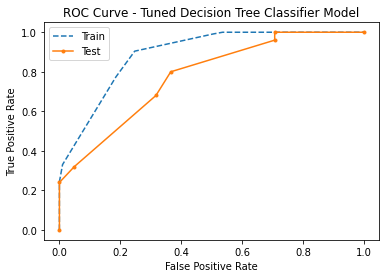

In [157]:
plt.plot(train_fpr_dt_model_tuned, train_tpr_dt_model_tuned, linestyle='--', label='Train')
plt.plot(test_fpr_dt_model_tuned, test_tpr_dt_model_tuned, marker='.', label='Test')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Decision Tree Classifier Model')
plt.legend()

plt.show()

### Feature Importance of Tuned Decision Tree Classifier Model - We can further simplify the model by dropping zero importance features

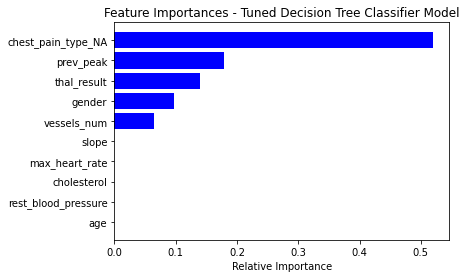

In [158]:
dt_model_tuned_features = list(X_train_after_drop_0_feat_imp_vars.columns)
dt_model_tuned_feat_importances =dt_model_tuned.feature_importances_
indices = np.argsort(dt_model_tuned_feat_importances)

plt.title('Feature Importances - Tuned Decision Tree Classifier Model')
plt.barh(range(len(indices)), dt_model_tuned_feat_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [dt_model_tuned_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()